# Example of a Report for CHEM2000 - Ion association

## Student Name: Student Name

## Student ID: 1234567890


In [1]:
# Import the required python packages here
import pandas as pd                  # Dataframes and reading CSV files
import numpy as np                   # Numerical libraries
import matplotlib.pyplot as plt      # Plotting library
import cekComputerLabs as cek

from lmfit import Model              # Curve fitting library
from IPython.display import Image    # Module to import images 
from scipy import stats              # Statistics module

# Variable to avoid priting debug statements
# Set it to False ONLY to produce the pdf/doc
debug = True 

# Introduction (if required)

The kinetics and thermodynamics of water exchange around magnesium in aqueous solution play a fundamental part in numerous molecular-level mechanisms relevant to both biological and geochemical contexts. Indeed, magnesium ions are ubiquitous in biological systems and play a crucial role in a wide range of major biophysical processes, such as the folding mechanisms of ribonucleic acid (RNA) systems, or the synthesis of ATP from ADP. From a simple ion pairing event,to the transport of Mg$^{2+}$ across cell membranes and its catalytic activity in metallo-enzymes, water exchange between the first and second solvation shells of magnesium is the most fundamental step governing all stages of these processes occurring in aqueous environments. In the geological record,dolomite, CaMg(CO$_3)_2$ , is the most common carbonate mineral precipitated from seawater, particularly in Palaeozoic and Precambrian sedimentary rocks where hundreds of meters-thick massive dolomite successions are often found. However,dolomite rarely forms in modern environmental systems despite seemingly similar geochemical conditions to past sedimentary cycles and is only scarcely found in highly alkaline and hypersaline environments in which microbial processes are likely to be involved. This paradoxical observation and consequential difficulty to understand how past dolomites were formed gave rise to the so-called "dolomite problem" that geochemists are still trying to resolve to this day, particularly a sit questions the validity of dolomites as archives of past surface environments (see, e.g., ref X). The well-established difficulty of synthesizing inorganic dolomite directly from solution under Earth surface conditions, i.e., T < 60$^\circ$C, has long been attributed to kinetic constraints resulting from the strong hydration effects around the magnesium ion.

# Task 1

## Describe the dataset

The free energy curves for the Mg$^{2+}$-CO$_3$ ion association have been generated at 7 different temperatures, starting at 290 K every 10 K. The data were recorded in files, named fes_XXX.dat, where XXX was the temperature of the virtual experiment. Each pairing free energy was computed in the range 0.2-1.2 nm.

## Task 2

## Plot the ion association free energy curves at the various temperatures

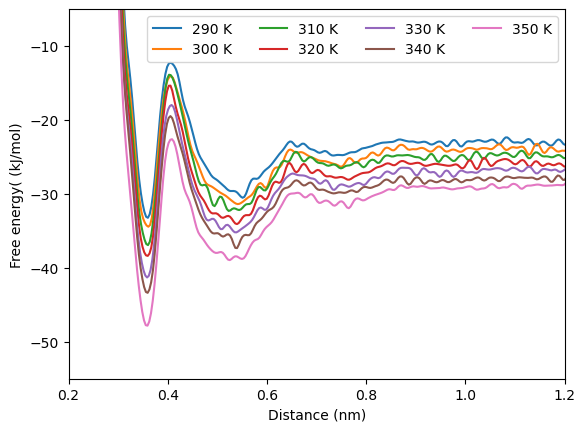

In [2]:
# List of files
temperatures = list(range(290,351,10))
# print(temperatures)
files = ["fes_"+str(t)+".dat" for t in temperatures]
data = []
for f in files:
    df = pd.read_csv(f,header=None, delim_whitespace=True, comment="#")
    df.columns = ("d","dG")
    data.append(df)

# print(df)

fig,ax = plt.subplots()
for i in range(len(data)):
    d = data[i]
    label = "{} K".format(temperatures[i])
    ax.plot(d["d"],d["dG"],label=label)

ax.set_ylim(-55,-5)
ax.set_xlim(0.2,1.2)

ax.set_xlabel("Distance (nm)")
ax.set_ylabel("Free energy( (kJ/mol)")
plt.legend(loc="upper right",ncol=4)
plt.show()

**Figure 1.** Ion pairing free energy between Mg$^{2+}$ and CO$_3^{2-}$ at different temperatures as a function of the Ca-C distance.

## Task 3

## Compute the ion association constants

The ion association constant can be readily computed from the ion pairing free energy by integrating the computed free energy as a function of the intermolecular distance, using the following equation
\begin{equation}
K_a = c^0 \int_{0}^{R_c} \exp\bigg[-\Delta G(r)/RT \bigg] \mathrm{d}r
\end{equation}
where $c^0$ is the standard concentration in atomic units, $R_c$ is the upper limit of the bound state, which was set to 1.2 nm, and $\Delta G(r)$ is the ion pairing free enegy plotted in Figure 1.

In [3]:
def integrate(xvals, yvals, xlower, xupper):
    '''
    Integrate y over x from xlower to xupper.
    Use trapz to integrate over points closest to xlower, xupper.
    the +1 to idx_max is for numpy half-open indexing.
    '''
    import numpy as np
    idx_min = np.argmin(np.abs(xvals - xlower))
    idx_max = np.argmin(np.abs(xvals - xupper)) + 1
    result = np.trapz(yvals[idx_min:idx_max], x=xvals[idx_min:idx_max])
    return result
    
R = 0.008314 # In kJ/mol
c0 = 0.006022 # in nm^(-3)

Ka = []
for i in range(len(data)):
    d = data[i]
    T = temperatures[i]
    x = d['d']
    y = np.exp(-d["dG"] / R / T)
    Ka.append( integrate(x,y,0.3,1.2) * c0 )
    # Compute the error for this calculation ... just hard coded it in this example
    error = 0.4 

    
if debug:
    for i in range(len(data)):
        T = temperatures[i]
        print("The ion association constant at {} K is {:6.1f} +/- {:.1f}".format(T,Ka[i],error))

The ion association constant at 290 K is  294.1 +/- 0.4
The ion association constant at 300 K is  340.3 +/- 0.4
The ion association constant at 310 K is  410.2 +/- 0.4
The ion association constant at 320 K is  504.3 +/- 0.4
The ion association constant at 330 K is  720.9 +/- 0.4
The ion association constant at 340 K is  893.4 +/- 0.4
The ion association constant at 350 K is 2159.0 +/- 0.4


| T (K) |  $K_a$ | Uncertainty |
|-------:|--------:|:-----------:|
| 290   | 294.1  | 0.4   |
| 300   | 340.3  | 0.4   |
| 310   | 410.2  | 0.4   |
| 320   | 504.3  | 0.4   |
| 330   | 720.9  | 0.4   |
| 340   | 893.4  | 0.4   |
| 350   | 2159.0 | 0.4   |

**Table 1.** Ion association constants computed in the temperature range 290-350 K, and their uncertainty.

# Task 4

## Compute the enthalpy and entropy of the ion association

From the ion association constants, we can compute the ion association free energy

\begin{equation}
\Delta G = -RT\ \ln\ K_a
\end{equation}

and then by fitting the free energy _vs_ T data, we can obtain the enthalpy and entropy of the ion association process

\begin{equation}
\Delta G = \Delta H - T\Delta S
\end{equation}

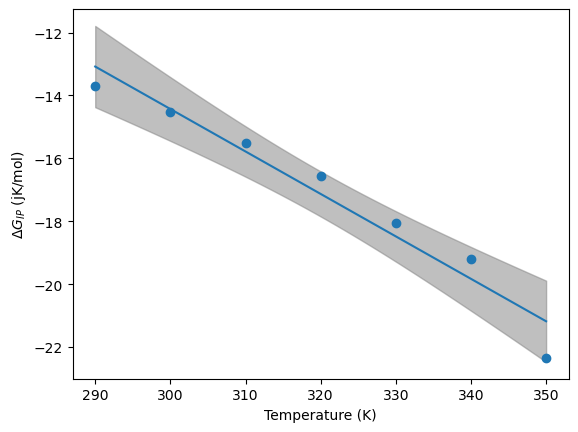

Fitted parameters:
  dH  = 26.1 +/- 8.8 kJ/mol
  dS  = 0.13 +/- 0.03 kJ/mol/K


In [4]:
def line(x,dH=1,dS=1):
    return dH - x * dS

# Prepare the data to be used in the fitting
R = 0.008314
x = temperatures
y = []
for i in range(len(data)):
    T = temperatures[i]
    y.append(-R*T*np.log(Ka[i])) # convert Ka to dG

# Create the lmfit model
lmodel = Model(line)

# Initialise the function parameters to be optimised
params = lmodel.make_params()

# Fit the data
# Using the inverse of the uncertainty as a weight
# Because all the uncertainties are the same this
# Produces the same result as a non-weighted fit
result = lmodel.fit(y, params, x=x, weights=1/0.4)

# define X and Y for marking the error in the plot
xValues = np.linspace(np.min(x),np.max(x))
yValues = line(xValues,*result.params.valuesdict().values())

# 95% confidence interval for the data
dely = result.eval_uncertainty(x=xValues,sigma=0.95)

# Create a figure and plot the data
fig, ax = plt.subplots()
ax.plot(xValues,yValues)
ax.fill_between(xValues, yValues-dely, yValues+dely, color="gray", alpha=0.5)
ax.scatter(x,y)

ax.set_xlabel("Temperature (K)")
ax.set_ylabel("$\Delta G_{IP}$ (jK/mol)")

# plt.legend()
plt.show()

if debug:
    print("Fitted parameters:")
    fmt = "  {:3} = {} +/- {} kJ/mol"
    val = result.params["dH"].value
    err = result.params["dH"].stderr * 1.960
    n = int(np.log10(err))-1
    print(fmt.format("dH",round(val,-n),round(err,-n)))

    fmt = "  {:3} = {} +/- {} kJ/mol/K"
    val = result.params["dS"].value
    err = result.params["dS"].stderr * 1.960
    n = int(np.log10(err))-1
    print(fmt.format("dS",round(val,-n),round(err,-n)))


**Figure 2.** Ion association free free energy as a function of temperature. The circles are the data from the virtual experiments, the blue lines is the best fitting line, which was used to determine the enthalpy and entropy of the process. The gray area is the 95\% confidence interval from the fit.

The ion association enthalpy and entropy computed from the linear fit of the ion association free energies (Figure 2) are $\Delta H = 26 \pm 9$ kJ/mol and $\Delta S = 130 \pm$ 30 J/(mol K).

# Task 4

## Compute the ion association free energy at 298.15K

In [5]:
xValue = np.array([298.15])
val = result.eval(x=xValue)
err = result.eval_uncertainty(x=xValue,sigma=0.95)

if debug:
    n = int(np.log10(err[0]))-1
    fmt = "The ion association free energy at {} K is {} +/- {} kJ/mol"
    print(fmt.format(xValue[0],round(val[0],-n),round(err[0],-n)))

The ion association free energy at 298.15 K is -14.2 +/- 1.1 kJ/mol


Using the entropy and enthalpy computed above, the predicted ion association free energy at 298.15 K is
-14.0 $\pm$ 1.0 kJ/mol.

# Discussion


The accurate description of Mg$^{2+}$-CO$_3^{2-}$ ion pair formation is key in describing the water exchange around Mg$^{2+}$ in the presence of carbonate. Metadynamics simulations conducted with both force fields find that the formation of a contact magnesium carbonate ion pair decreases the energy barrier for water exchange relative to free Mg$^{2+}$ in solution. Similar behavior has been reported for other metal ion-ligand complexes,70,71 but to the best of our knowledge no experimental values are available for water exchange around the Mg-CO$_3$ complex. Our prediction that water exchange is more labile around the Mg-CO$_3$ complex is at variance with the computational results from Yang et al. [1]  and Hamm et al. [2], who did not observe any significant increase in the water exchange rate when Mg2+ formed a complex with either HS$^-$ or aspartate. However, Lincoln [3] suggested that each metal ion-ligand complex behaves differently; for example, he reported that CrO$_4^{2-}$ increases the water lability of the aqueous Ca$^{2+}$ ion but has little effect on the water exchange around Mg$^{2+}$; therefore, more experimental work on the magnesium carbonate system is required to corroborate our results.

# References (if necessary)

1. Yang, Y.; Sahai, N.; Romanek, C. S.; Chakraborty, S. A computational study of Mg$^{2+}$ dehydration in aqueous solution in the presence of HS- and other monovalent anions - Insights to dolomite formation. Geochim. Cosmochim. Acta 2012, 88, 77-87.
2. Hamm, L. M.; Wallace, A. F.; Dove, P. M. Molecular dynamics of ion hydration in the presence of small carboxylated molecules and implications for calcification. J. Phys. Chem. B 2010, 114, 10488-10495.
3. Lincoln, S. Mechanistic Studies of Metal Aqua Ions: A Semi-Historical Perspective. Helv. Chim. Acta 2005, 88, 523-545.

In [6]:
if debug:
    cek.convertNotebook()